In [1]:
"""
This script collects all my answers to the questions regarding the third Machine Learning project 
from the Udemy course - 2022 Python for Machine Learning & Data Science Masterclass

The goal is to  use the wine dataset shown below to develop a machine learning model (SVR) that attempts to predict 
if a wine is "Legit" or "Fraud" based on various chemical features.

Dataframe was uploaded in the same folder as this script.

""";

In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r'C:/Users/Utilizador/Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
#Unique lables
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [5]:
##
df['type'].unique()

array(['red', 'white'], dtype=object)

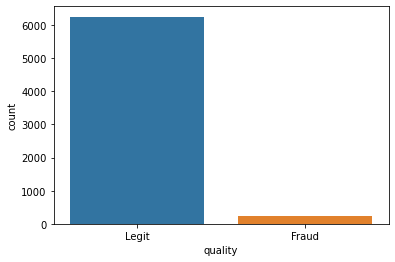

In [6]:
#Countplot to show if the labels are balanced

sns.countplot(data = df, x = 'quality');

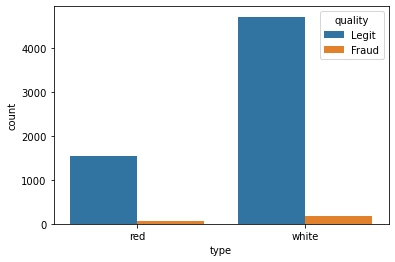

In [7]:
"""
Let's find out if there is a difference between red and white wine when it comes to fraud. 
Create a countplot that has the wine type on the x axis with the hue separating columns by Fraud vs Legit.

"""

sns.countplot(data = df, x = 'type', hue = 'quality')

In [8]:
#What percentage of red wines are Fraud? What percentage of white wines are fraud?

#Red
100 * len(df[(df['type'] == 'red') & (df['quality'] == 'Fraud')]) / len(df[df['type'] == 'red'])

3.9399624765478425

In [9]:
#White
100 * len(df[(df['type'] == 'white') & (df['quality'] == 'Fraud')]) / len(df[df['type'] == 'white'])

3.736218864842793

In [10]:
#Calculate the correlation between the various features and the "quality" column
#To do this, it is necessary to change column 'Quality' type of data

In [11]:
df['test'] = df['quality'].map({'Legit':0, 'Fraud':1})

df.corr()['test']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
test                    1.000000
Name: test, dtype: float64

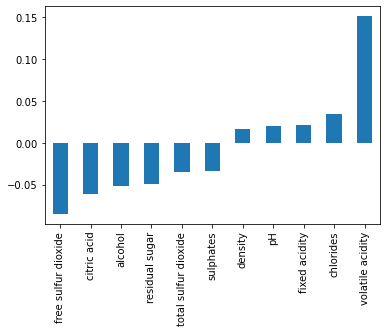

In [12]:
#Create a bar plot of the correlation values to Fraudlent wine

df.corr()['test'][:-1].sort_values().plot(kind = 'bar');

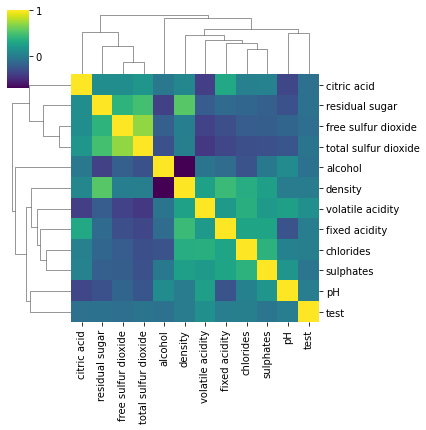

In [13]:
#Create a clustermap with seaborn to explore the relationships between variables

sns.clustermap(data = df.drop('type', axis = 1).corr(), cmap = 'viridis', figsize = (6,6));

Machine Learning Model

In [14]:
#Convert the categorical column "type" from a string or "red" or "white" to dummy variables
#Type is binary, as seen in the unique values

df = df.drop('test', axis = 1)

df['type'] = df['type'].map({'red': 0, 'white': 1})

In [15]:
# Separate out the data into X features and y target label ("quality" column)

X = df.drop('quality', axis = 1)
y = df['quality']

In [16]:
#Perform a Train|Test split on the data, with a 10% test size.

from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
#Scale the X train and X test data

from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
#Create an instance of the model SVC and determine the best parameters for it, using grid search

from sklearn. model_selection import GridSearchCV
from sklearn.svm import SVC

In [22]:
svr = SVC(class_weight = 'balanced')

In [23]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,1


In [27]:
#Param grid
params_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4]}

In [28]:
grid = GridSearchCV(svr, param_grid = params_grid)

In [29]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [30]:
grid.best_params_

{'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [31]:
# Display the confusion matrix and classification report for your model

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [32]:
grid_preds = grid.predict(scaled_X_test)

In [33]:
confusion_matrix(y_test, grid_preds)

array([[  3,  24],
       [  6, 617]], dtype=int64)

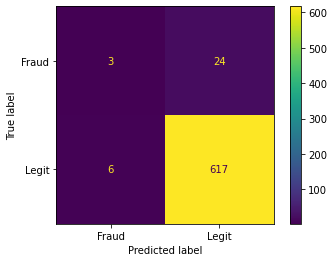

In [34]:
plot_confusion_matrix(grid, scaled_X_test, y_test)